In [1]:
# Project: Studence Success Prediction( Classification)
import pandas as pd

df = pd.read_csv(r"C:\Users\vmahe\Downloads\student_success_balanced.csv")
print(df.head())
print("\n Dataset shape:")
print(df.shape)
print("\nDataset information:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe())
print("\n Misssing Data:\n")
print(df.isnull().sum())


   StudyHours  Attendance  PastScore  SleepHours Internet Passed
0    1.898997   71.368828  35.015264    3.986070       No     No
1    2.424608   53.827603  37.406940    6.987450       No     No
2    3.236751   34.031980  42.168360    6.284438      Yes     No
3    5.245158   55.671770  49.160520    5.552326      Yes     No
4    4.313037   87.191503  80.562300    9.231300       No    Yes

 Dataset shape:
(1000, 6)

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudyHours  1000 non-null   float64
 1   Attendance  1000 non-null   float64
 2   PastScore   1000 non-null   float64
 3   SleepHours  1000 non-null   float64
 4   Internet    1000 non-null   object 
 5   Passed      1000 non-null   object 
dtypes: float64(4), object(2)
memory usage: 47.0+ KB
None

Summary Statistics:

        StudyHours   Attendance    PastScore   

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.98      1.00      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



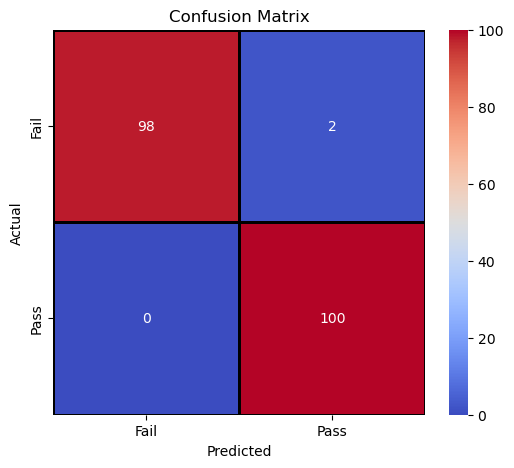

------Predict Your Result------


Enter study Hours: 7
Enter Attendance: 7
Enter Past Score: 35
enter Sleep Hours: 0
Enter if uses internet: 1


Prediction Based on input:Fail


C:\Users\vmahe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\vmahe\Downloads\student_success_balanced.csv")
df.head()
le= LabelEncoder()
df['Internet']= le.fit_transform(df['Internet'])
df['Passed']= le.fit_transform(df['Passed'])
features = ['StudyHours','Attendance','PastScore','SleepHours','Internet']
scaler= StandardScaler()
df_scaled= df.copy()
df_scaled[features]=scaler.fit_transform(df[features])

X= df_scaled[features]
y= df_scaled['Passed']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

model= LogisticRegression()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot= True, cmap='coolwarm', linewidth='1',linecolor='black',fmt='d'
            ,xticklabels=['Fail','Pass'],yticklabels=['Fail','Pass'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("------Predict Your Result------")
try:
    study_hours=float(input("Enter study Hours:"))
    attendance = float(input("Enter Attendance:"))
    past_score = float(input("Enter Past Score:"))
    sleep_hours =float(input("enter Sleep Hours:"))
    internet = input("Enter if uses internet:")
    
    user_input_df= pd.DataFrame([{
        'StudyHours': study_hours,
        'Attendance':attendance,
        'PastScore': past_score,
        'SleepHours': sleep_hours,
        'Internet': internet 
    }])

    user_input_scaled= scaler.transform(user_input_df)
    prediction = model.predict(user_input_scaled)[0]
    Result= "PASS" if prediction==1 else "Fail"
    print(f"Prediction Based on input:{Result}")       

except Exception as e:
    print(f"Error: {e}")


In [9]:
columns=['StudyHours','Attendance','PastScore','SleepHours','Internet','Passed']
corr_matrix= df[columns].corr()
corr_matrix

,StudyHours,Attendance,PastScore,SleepHours,Internet,Passed
StudyHours,1.000000,0.491693,0.599580,0.540024,0.119512,0.747941
Attendance,0.491693,1.000000,0.580464,0.479399,0.116291,0.705344
PastScore,0.599580,0.580464,1.000000,0.588468,0.137951,0.818543
SleepHours,0.540024,0.479399,0.588468,1.000000,0.185924,0.697456
Internet,0.119512,0.116291,0.137951,0.185924,1.000000,0.200786
Passed,0.747941,0.705344,0.818543,0.697456,0.200786,1.000000
